# Import PDK

## Import PDK in GDS format

To import a PDK from GDS format into gdsfactory you need 2 things:

- GDS file with all the cells that you want to import in the PDK (or separate GDS files, one per cell)
- Klayout layer properties files, to define the Layers that you can use when creating new custom Components.

GDS files are great for describing geometry thanks to the concept of References, where you store any geometry only once in memory.

For storing device metadata (settings, port locations, port widths, port angles ...) there is no clear standard.

`gdsfactory` stores the that metadata in `YAML` files, and also has functions to add pins

- `Component.write_gds()` saves GDS
- `Component.write_gds_metadata()` save GDS + YAML metadata

2023-01-03 02:09:33.587 | INFO     | gdsfactory.config:<module>:48 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.17.0


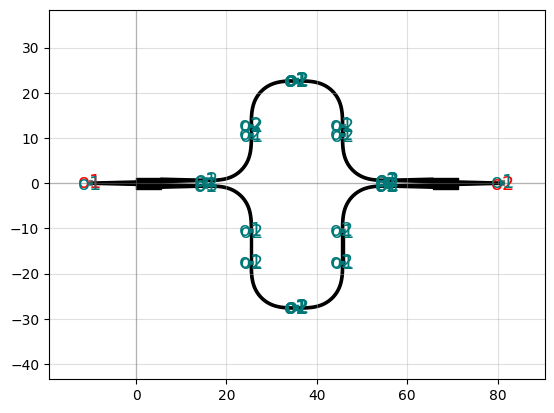

mzi: uid 7186d306, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [1]:
import gdsfactory as gf

c = gf.components.mzi()
c

You can write **GDS** files only

In [2]:
gdspath = c.write_gds("extra/mzi.gds")

2023-01-03 02:09:34.888 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/mzi.gds'


Or **GDS** with **YAML** metadata information (ports, settings, cells ...)

In [3]:
gdspath = c.write_gds_with_metadata("extra/mzi.gds")

2023-01-03 02:09:34.896 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/mzi.gds'


2023-01-03 02:09:34.967 | INFO     | gdsfactory.component:write_gds_with_metadata:1581 - Write YAML metadata to 'extra/mzi.yml'


This created a `mzi.yml` file that contains:
- ports
- cells (flat list of cells)
- info (function name, module, changed settings, full settings, default settings)

In [4]:
c.metadata.keys()

dict_keys(['name', 'module', 'function_name', 'info', 'info_version', 'full', 'changed', 'default', 'child'])

You can read GDS files into gdsfactory thanks to the `import_gds` function

`import_gds` reads the same GDS file from disk without losing any information

2023-01-03 02:09:34.986 | INFO     | gdsfactory.read.import_gds:import_gds:110 - Read YAML metadata from extra/mzi.yml


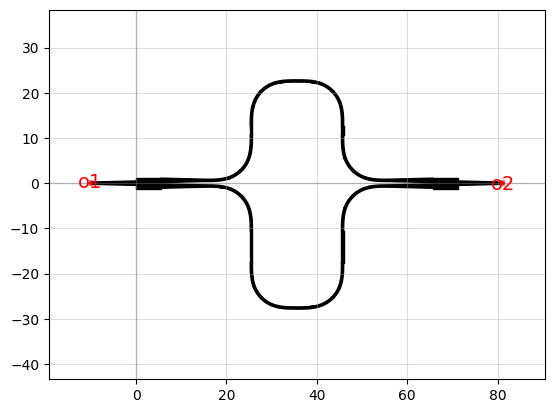

mzi: uid 8499537c, ports ['o1', 'o2'], references ['mmi1x2_1', 'mmi1x2_2', 'bend_euler_1', 'straight_length7p0_1', 'bend_euler_2', 'straight_length0p1_1', 'bend_euler_3', 'straight_length2p0_1', 'bend_euler_4', 'straight_length0p1_2', 'bend_euler_5', 'bend_euler_6', 'straight_5f322648_1', 'straight_53ca3249_1', 'straight_e1491594_1', 'bend_euler_7', 'bend_euler_8', 'straight_5f322648_2', 'straight_9b233609_1', 'straight_e1491594_2'], 0 polygons

In [5]:
gf.clear_cache()

c = gf.import_gds(gdspath, read_metadata=True)
c

2023-01-03 02:09:35.212 | INFO     | gdsfactory.read.import_gds:import_gds:110 - Read YAML metadata from extra/mzi.yml


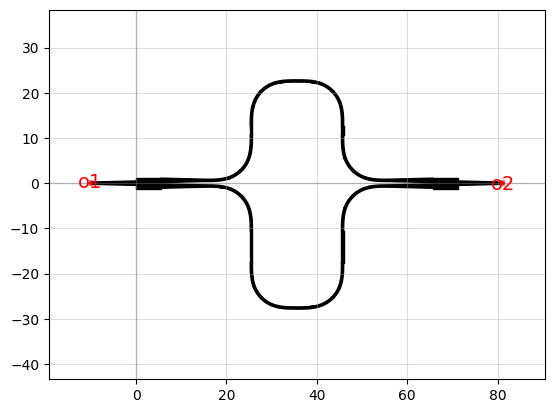

mzi: uid 21253313, ports ['o1', 'o2'], references ['mmi1x2_1', 'mmi1x2_2', 'bend_euler_1', 'straight_length7p0_1', 'bend_euler_2', 'straight_length0p1_1', 'bend_euler_3', 'straight_length2p0_1', 'bend_euler_4', 'straight_length0p1_2', 'bend_euler_5', 'bend_euler_6', 'straight_5f322648_1', 'straight_53ca3249_1', 'straight_e1491594_1', 'bend_euler_7', 'bend_euler_8', 'straight_5f322648_2', 'straight_9b233609_1', 'straight_e1491594_2'], 0 polygons

In [6]:
import gdsfactory as gf

c2 = gf.import_gds(gdspath, name="mzi_sample", read_metadata=True)
c2

In [7]:
c2.name

'mzi'

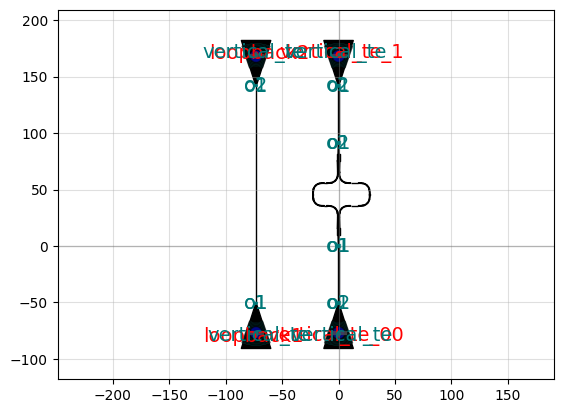

mzi_move_9ec06dec_add_f_29d40b0f: uid c3a10901, ports ['vertical_te_00', 'vertical_te_1', 'loopback1', 'loopback2'], references ['move_1', 'straight_1', 'straight_2', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'straight_3', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4'], 0 polygons

In [8]:
c3 = gf.routing.add_fiber_single(c2)
c3

In [9]:
gdspath = c3.write_gds_with_metadata("extra/pdk.gds")

2023-01-03 02:09:35.675 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/pdk.gds'


2023-01-03 02:09:35.760 | INFO     | gdsfactory.component:write_gds_with_metadata:1581 - Write YAML metadata to 'extra/pdk.yml'


In [10]:
gf.labels.write_labels.write_labels_klayout(gdspath, layer_label=gf.LAYER.LABEL)

2023-01-03 02:09:35.843 | INFO     | gdsfactory.labels.write_labels:write_labels_klayout:93 - Wrote 4 labels to CSV /home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/pdk.csv


PosixPath('extra/pdk.csv')

### add ports from pins

Sometimes the GDS does not have YAML metadata, therefore you need to figure out the port locations, widths and orientations.

gdsfactory provides you with functions that will add ports to the component by looking for pins shapes on a specific layers (port_markers or pins)

There are different pin standards supported to automatically add ports to components:

- PINs towards the inside of the port (port at the outer part of the PIN)
- PINs with half of the pin inside and half outside (port at the center of the PIN)
- PIN with only labels (no shapes). You have to manually specify the width of the port.


Lets add pins, save a GDS and then import it back.

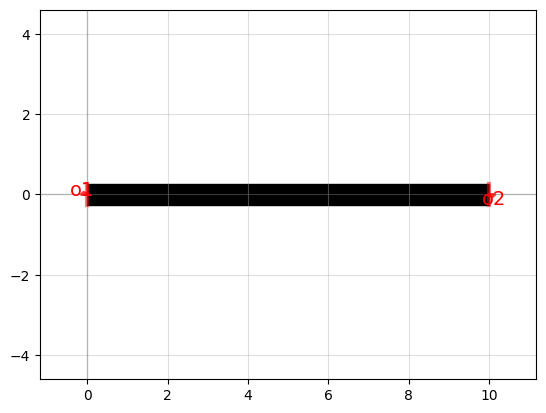

straight_1514d1a3: uid ffdb6bea, ports ['o1', 'o2'], references [], 3 polygons

In [11]:
import gdsfactory as gf

c = gf.components.straight(
    decorator=gf.add_pins.add_pins
)  # add pins inside the component
c

In [12]:
gdspath = c.write_gds("extra/wg.gds")

2023-01-03 02:09:36.037 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/wg.gds'


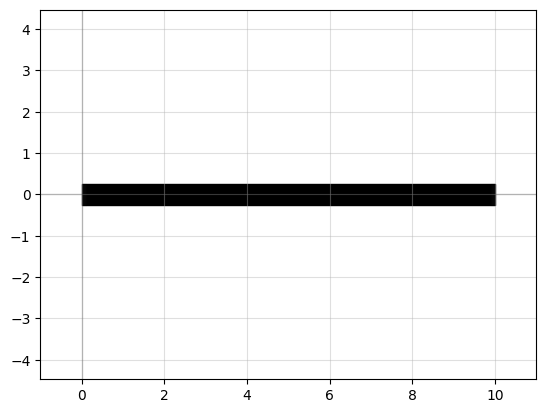

straight_1514d1a3: uid be63a62e, ports [], references [], 3 polygons

In [13]:
gf.clear_cache()
c2 = gf.import_gds(gdspath)
c2

In [14]:
c2.ports  # import_gds does not automatically add the pins

{}

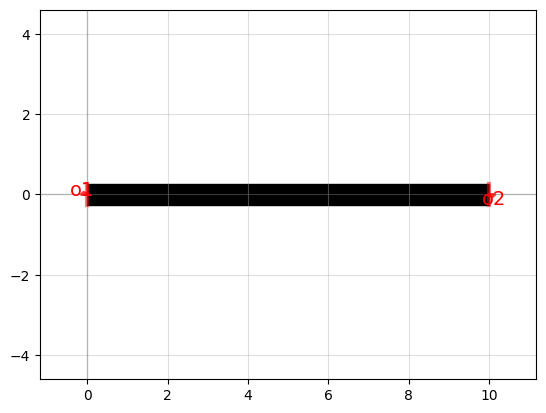

straight_1514d1a3: uid 3711e097, ports ['o1', 'o2'], references [], 3 polygons

In [15]:
c3 = gf.import_gds(gdspath, decorator=gf.add_ports.add_ports_from_markers_inside)
c3

In [16]:
c3.ports

{'o1': Port (name o1, center [0. 0.], width 0.5, orientation 180, layer PORT, port_type optical),
 'o2': Port (name o2, center [10.  0.], width 0.5, orientation 0, layer PORT, port_type optical)}

Foundries provide PDKs in different formats and commercial tools.

The easiest way to import a PDK into gdsfactory is to

1. have each GDS cell into a separate GDS file
2. have one GDS file with all the cells inside
3. Have a KLayout layermap. Makes easier to create the layermap.

With that you can easily create the PDK as as python package.

Thanks to having a gdsfactory PDK as a python package you can

- version control your PDK using GIT to keep track of changes and work on a team
    - write tests of your pdk components to avoid unwanted changes from one component to another.
    - ensure you maintain the quality of the PDK with continuous integration checks
    - pin the version of gdsfactory, so new updates of gdsfactory won't affect your code
- name your PDK version using [semantic versioning](https://semver.org/). For example patches increase the last number (0.0.1 -> 0.0.2)
- install your PDK easily `pip install pdk_fab_a` and easily interface with other tools



To create a **Python** package you can start from a customizable template (thanks to cookiecutter)

I usually create a python package by running this 2 commands inside a terminal

```
pip install cookiecutter
cookiecutter https://github.com/joamatab/cookiecutter-pypackage-minimal
```

It will ask you some questions to fill in the template (name of the package being the most important)


Then you can add the information about the GDS files and the Layers inside that package

In [17]:
import gdsfactory as gf
from gdsfactory.layers import lyp_to_dataclass
from gdsfactory.config import PATH

In [18]:
print(lyp_to_dataclass(PATH.klayout_lyp))


from pydantic import BaseModel
from gdsfactory.types import Layer


class LayerMap(BaseModel):
    CAPACITOR: Layer = (42, 0)
    DEEPETCH: Layer = (3, 6)
    DEEPTRENCH: Layer = (4, 0)
    DICING: Layer = (65, 0)
    DRC_EXCLUDE: Layer = (67, 0)
    DRC_MARKER: Layer = (205, 0)
    DevRec: Layer = (68, 0)
    ERROR_MARKER: Layer = (207, 0)
    Errors: Layer = (69, 0)
    FLOORPLAN: Layer = (64, 0)
    FbrTgt: Layer = (81, 0)
    GE: Layer = (5, 0)
    GENPP: Layer = (26, 0)
    GEPPP: Layer = (29, 0)
    LABEL: Layer = (201, 0)
    LABEL_INSTANCES: Layer = (206, 0)
    LABEL_SETTINGS: Layer = (202, 0)
    Lumerical: Layer = (733, 0)
    M1: Layer = (41, 0)
    M1TILES: Layer = (191, 0)
    M2: Layer = (45, 0)
    M3: Layer = (49, 0)
    METALOPEN: Layer = (46, 0)
    MH: Layer = (47, 0)
    MONITOR: Layer = (101, 0)
    N: Layer = (20, 0)
    NOTILE_M1: Layer = (71, 0)
    NOTILE_M2: Layer = (72, 0)
    NOTILE_M3: Layer = (73, 0)
    NP: Layer = (22, 0)
    NPP: Layer = (24, 0)
    O

2023-01-03 02:09:36.355 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to 'extra/pdk.gds'


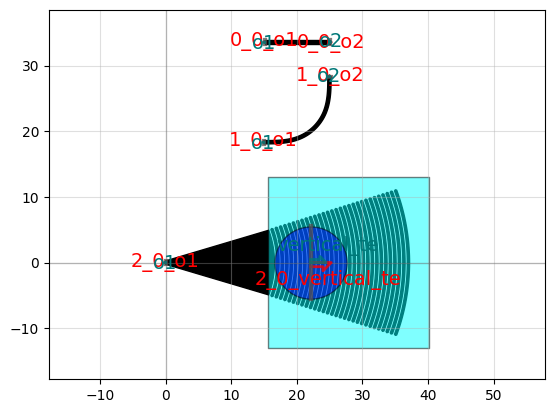

grid_d9610e5f: uid e52c8243, ports ['0_0_o1', '0_0_o2', '1_0_o1', '1_0_o2', '2_0_vertical_te', '2_0_o1'], references ['0_0', '1_0', '2_0'], 0 polygons

In [19]:
# lets create a sample PDK (for demo purposes only) using GDSfactory
# if the PDK is in a commercial tool you can also do this. Make sure you save a single pdk.gds
sample_pdk_cells = gf.grid(
    [
        gf.components.straight,
        gf.components.bend_euler,
        gf.components.grating_coupler_elliptical,
    ]
)
sample_pdk_cells.write_gds("extra/pdk.gds")
sample_pdk_cells

In [20]:
sample_pdk_cells.get_dependencies()

[bend_euler: uid 8df35d57, ports ['o1', 'o2'], references [], 1 polygons,
 straight: uid 7cffa42e, ports ['o1', 'o2'], references [], 1 polygons,
 grating_coupler_elliptical: uid f62c5289, ports ['vertical_te', 'o1'], references ['circle_1'], 32 polygons]

In [21]:
# we write the sample PDK into a single GDS file
gf.clear_cache()
gf.write_cells.write_cells(gdspath="extra/pdk.gds", dirpath="extra/gds")

2023-01-03 02:09:36.530 | INFO     | gdsfactory.component:_write_library:1496 - Wrote to '/home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/gds/grid_d9610e5f.gds'


{'grid_d9610e5f': PosixPath('/home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/gds/grid_d9610e5f.gds')}

In [22]:
# Lets generate the script that we need to have to each GDS cell into gdsfactory
import gdsfactory as gf

print(gf.write_cells.get_import_gds_script("extra/gds"))


from pathlib import PosixPath
from functools import partial
import gdsfactory as gf

add_ports_optical = gf.partial(
    gf.add_ports.add_ports_from_markers_inside, pin_layer=(1, 0), port_layer=(2, 0)
)
add_ports_electrical = gf.partial(
    gf.add_ports.add_ports_from_markers_inside, pin_layer=(41, 0), port_layer=(1, 0)
)
add_ports = gf.compose(add_ports_optical, add_ports_electrical)


gdsdir = PosixPath('/home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/gds')

import_gds = partial(gf.import_gds, gdsdir=gdsdir, decorator=add_ports)



@gf.cell
def grid_d9610e5f()->gf.Component:
    '''Returns grid_d9610e5f fixed cell.'''
    return import_gds('grid_d9610e5f.gds')



You can also include the code to plot each fix cell in the docstring.

In [23]:
print(gf.write_cells.get_import_gds_script("extra/gds", module="samplepdk.components"))


from pathlib import PosixPath
from functools import partial
import gdsfactory as gf

add_ports_optical = gf.partial(
    gf.add_ports.add_ports_from_markers_inside, pin_layer=(1, 0), port_layer=(2, 0)
)
add_ports_electrical = gf.partial(
    gf.add_ports.add_ports_from_markers_inside, pin_layer=(41, 0), port_layer=(1, 0)
)
add_ports = gf.compose(add_ports_optical, add_ports_electrical)


gdsdir = PosixPath('/home/runner/work/gdsfactory/gdsfactory/docs/notebooks/extra/gds')

import_gds = partial(gf.import_gds, gdsdir=gdsdir, decorator=add_ports)



@gf.cell
def grid_d9610e5f()->gf.Component:
    '''Returns grid_d9610e5f fixed cell.

    .. plot::
      :include-source:

      import samplepdk

      c = samplepdk.components.grid_d9610e5f()
      c.plot()
    '''
    return import_gds('grid_d9610e5f.gds')




## Import PDK from other python packages

### phidl

To import a phidl pdk you can use the `gf.read.from_phidl`

### dphox

To import a dphox pdk you can use the `gf.read.from_dphox`

### picwriter

To import a picwriter pdk you can use the `gf.read.from_picwriter`

### nazca

To import a nazca pdk you can use the following code:

In [24]:
from typing import Dict, Tuple
from gdsfactory.component import Component


def from_nazca(
    cell,
    layer_name_to_tuple: Dict[str, Tuple[int, int]],
    port_layer: Tuple[int, int] = (1, 0),
) -> Component:
    """Converts a nazca cell into a gdsfactory Component.

    Make sure you install nazca.

    Args:
        cell: nazca cell.
        layer_name_to_tuple: nazca layer name to gdslayer, gdspurpose.
        port_layer: layer for the ports.
    """
    import nazca as nd

    c = Component(cell.name)
    i = 0

    for named_tuple in nd.cell_iter(cell, flat=True):
        if named_tuple.cell_start:
            for polygon, points, bbox in named_tuple.iters["polygon"]:
                if polygon.layer == "bb_pin":
                    x0 = points[0][0]
                    y0 = points[0][1]

                    dx = points[1][0] - points[6][0]
                    dy = points[1][1] - points[6][1]

                    if dx > dy:
                        width = dx
                        if dx > 0:  # east
                            orientation = 90
                        else:
                            orientation = 270
                    else:
                        width = dy
                        if dy > 0:  # north
                            orientation = 180
                        else:
                            orientation = 0

                    name = f"o{i}"
                    c.add_port(
                        name=name,
                        center=(x0, y0),
                        width=width,
                        orientation=orientation,
                        layer=port_layer,
                    )
                    i += 1
                c.add_polygon(points, layer=layer_name_to_tuple[polygon.layer])

    c.auto_rename_ports()
    return c


def demo():
    import nazca as nd
    import nazca.demofab as demo
    import pandas as pd

    n = demo.deep.euler(angle=90).put()
    df = pd.read_csv(demo.layer_file)

    layer_name_to_tuple = dict(
        Deep=(1, 0),
        DeepTrench=(4, 0),
        bb_pin=(501, 0),
    )
    c = from_nazca(n, layer_name_to_tuple=layer_name_to_tuple)
    c.show(show_ports=True)

## Foundry PDKs

You can build PDKs for different foundries. PDKs contain some foundry IP (layer stack, Design Rules) and are available only under and NDA.
For accessing the gdsfactory PDK please contact your foundry for access.


Some PDKs are open source and publicly available:

- [ubcpdk](https://github.com/gdsfactory/ubc)
- [sky130](https://github.com/gdsfactory/skywater130)


## Build your own PDK

You can create a PDK as a python library using a cookiecutter template. For example, you can use this one.

```
pip install cookiecutter
cookiecutter https://github.com/joamatab/cookiecutter-pypackage-minimal
```

Or you can fork the ubcpdk and create new PCell functions that use the correct layers for your foundry. For example.

```

from pydantic import BaseModel


class LayerMap(BaseModel):
    WGCORE = (3, 0)
    LABEL = (100, 0)
    DEVREC: Layer = (68, 0)
    LABEL: Layer = (10, 0)
    PORT: Layer = (1, 10)  # PinRec
    PORTE: Layer = (1, 11)  # PinRecM
    FLOORPLAN: Layer = (99, 0)

    TE: Layer = (203, 0)
    TM: Layer = (204, 0)
    TEXT: Layer = (66, 0)
    LABEL_INSTANCE: Layer = (66, 0)


LAYER = LayerMap()

```
